Importation des libraries necesasires et chargement des donnees

In [25]:
# importer les bibliotheques necessaires
import numpy as np
import pandas as pd # biblio pour la manipulation des donnees
import matplotlib.pyplot as plt # biblio pour les visualisations
import seaborn as sns # biblio pour statistiques avancees
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [26]:
# importer le dataset des joueurs qu'on a cree et qu'on va utiliser dans notre modele
df = pd.read_csv('/content/players_312.csv')

Comprendre la Dataset


In [27]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,1875,377,3,49,72,83,84,28
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,1651,351,1,72,54,61,70,44
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,1897,409,1,85,74,78,85,31
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,1644,353,1,72,50,59,66,52
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,1960,405,1,72,70,80,81,52


In [28]:
df.shape

(3120, 59)

In [29]:
df.describe()

,Age,ID,Best overall,Growth,Total attacking,Total skill,Total movement,Total power,Total mentality,Total defending,Total goalkeeping,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,24.218590,236637.525321,74.368910,5.875962,291.675641,307.003846,349.397756,328.516026,293.083333,155.752564,72.398077,1797.827244,394.946474,1.450962,73.015385,61.509936,65.975321,71.527244,54.649359
std,4.876116,39161.333184,6.430639,5.714962,72.207131,75.263189,52.477820,50.544401,63.164889,64.891734,79.925173,258.036837,38.493322,0.804862,10.379235,14.111539,9.621618,8.620042,18.068982
min,16.000000,41.000000,49.000000,0.000000,51.000000,61.000000,133.000000,146.000000,72.000000,24.000000,13.000000,843.000000,253.000000,1.000000,29.000000,21.000000,31.000000,34.000000,16.000000
25%,20.000000,224285.000000,70.000000,0.000000,267.000000,280.000000,325.000000,299.000000,268.000000,97.000000,47.000000,1670.750000,369.000000,1.000000,67.000000,53.000000,60.000000,66.750000,38.000000
50%,23.000000,243017.000000,75.000000,5.000000,304.000000,321.000000,359.000000,335.000000,303.000000,174.000000,52.000000,1839.000000,398.000000,1.000000,74.000000,64.000000,67.000000,72.000000,58.000000
75%,27.000000,262621.000000,79.000000,10.000000,339.000000,357.000000,385.000000,366.000000,334.000000,212.000000,57.000000,1973.250000,422.000000,2.000000,80.000000,72.000000,73.000000,77.000000,70.000000
max,44.000000,279922.000000,93.000000,25.000000,440.000000,465.000000,462.000000,442.000000,417.000000,269.000000,433.000000,2330.000000,500.000000,5.000000,97.000000,93.000000,94.000000,94.000000,89.000000


In [30]:
# supprimer les valeurs nulles de la dataset
df.isnull().sum().sum()

0

pre-traitement des donnees et feature engineering

In [35]:
# drop empty column
df.drop(columns='Unnamed: 64', inplace=True, errors='ignore')


In [36]:
# harmoniser et normaliser les colums de la dataset
df.columns = df.columns.str.lower().str.replace(' / ','_').str.replace(' ','_')
df.columns

Index(['name', 'age', 'overall_rating', 'potential', 'team_&_contract', 'id',
       'height', 'weight', 'foot', 'best_overall', 'best_position', 'growth',
       'value', 'wage', 'release_clause', 'total_attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'total_skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'total_movement', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'total_power', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'total_mentality',
       'aggression', 'interceptions', 'att._position', 'vision', 'penalties',
       'composure', 'total_defending', 'defensive_awareness',
       'standing_tackle', 'sliding_tackle', 'total_goalkeeping', 'total_stats',
       'base_stats', 'international_reputation', 'pace_diving',
       'shooting_handling', 'passing_kicking', 'dribbling_reflexes',
       'defending_pace'],
      dtype='object')

In [37]:
# split name column into name & position column, and remove all numbers

import re

# list of soccer positions
positions = ['GK', 'LB', 'LWB', 'RB', 'RWB', 'CB', 'CAM', 'CM', 'CDM', 'LW', 'RW' ,'LM', 'RM', 'LF', 'RF', 'CF', 'ST']

def split_name_position(row):
    row = re.sub(r'\d+', '', row) # remove all numbers
    parts = row.split() # split row into parts
    name_chunk = [part for part in parts if part not in positions] # identify names
    position_chunk = [part for part in parts if part in positions] # identify positions

    # stitch names and positions
    name = ' '.join(name_chunk)
    position = ', '.join(position_chunk)
    return pd.Series([name, position])

df[['player_name', 'position']] = df['name'].apply(split_name_position)
df.drop('name', axis=1, inplace=True)

<Axes: xlabel='no_of_playable_positions', ylabel='Count'>

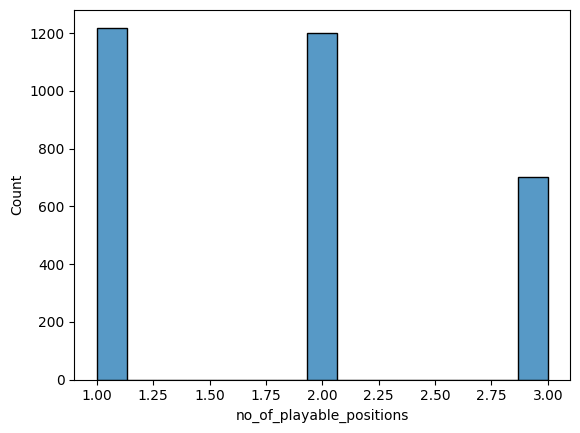

In [38]:
# get no of playable positions for each player
df['no_of_playable_positions'] = df.position.apply(lambda x: len(x.split(','))).astype(int)
sns.histplot(df['no_of_playable_positions'])

In [39]:
# split team_&_contract column to team & contract['start'] & contract['end'] column
df[['team', 'contract']] = df['team_&_contract'].str.split('\n', expand=True)

# extract start and end dates
df['contract_start'] = df['contract'].str.split(' ~ ').str[0]
df['contract_end'] = df['contract'].str.split(' ~ ').str[-1]

# convert 'contract_end' to last 4 characters if they are not dates
df['contract_end'] = df['contract_end'].apply(lambda x: x if x.isdigit() else x[-4:])
df.drop(['team_&_contract', 'contract'], axis=1, inplace=True)

df.head()

,age,overall_rating,potential,id,height,weight,foot,best_overall,best_position,growth,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,att._position,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,sliding_tackle,total_goalkeeping,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,player_name,position,no_of_playable_positions,team,contract_start,contract_end
0,34,78,78,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,1875,377,3,49,72,83,84,28,Ronaldinho,"CAM, ST",2,Querétaro,2014,2016
1,19,65,81,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,1651,351,1,72,54,61,70,44,O. Hutchinson,"RM, CAM",2,Ipswich Town,2022,2025
2,23,82,86,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,1897,409,1,85,74,78,85,31,Brahim,CAM,1,Real Madrid,2019,2027
3,17,62,80,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,1644,353,1,72,50,59,66,52,K. Wätjen,CM,1,Borussia Dortmund,2024,2028
4,18,77,88,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,1960,405,1,72,70,80,81,52,A. Güler,"CAM, RM",2,Real Madrid,2023,2029


In [40]:
# replace errant values (e.g. 'loan') with blanks
pattern = r'^\d{4}$'

df['contract_start'] = df['contract_start'].apply(lambda x: re.match(pattern, str(x)).group() if re.match(pattern, str(x)) else '')
df['contract_end'] = df['contract_end'].apply(lambda x: re.match(pattern, str(x)).group() if re.match(pattern, str(x)) else '')

df['contract_start'] = pd.to_numeric(df['contract_start'], errors='coerce').fillna(0).astype(int)
df['contract_end'] = pd.to_numeric(df['contract_end'], errors='coerce').fillna(0).astype(int)

df.contract_start.unique(), df.contract_end.unique()

(array([2014, 2022, 2019, 2024, 2023, 2021, 2020, 2012,    0, 2018, 2016,
        2015, 2017, 2010, 2011, 2013, 2008, 1993, 1998, 2009, 1999, 2007]),
 array([2016, 2025, 2027, 2028, 2029, 2026, 2024, 2030,    0, 2031, 2032,
        2023, 2017, 2020, 2021, 2018, 2014, 2022, 2013, 2009, 2010, 2019,
        2015, 2012]))

In [42]:
df.contract_end.unique()

array([2016, 2025, 2027, 2028, 2029, 2026, 2024, 2030,    0, 2031, 2032,
       2023, 2017, 2020, 2021, 2018, 2014, 2022, 2013, 2009, 2010, 2019,
       2015, 2012])

<Axes: xlabel='contract_end', ylabel='Count'>

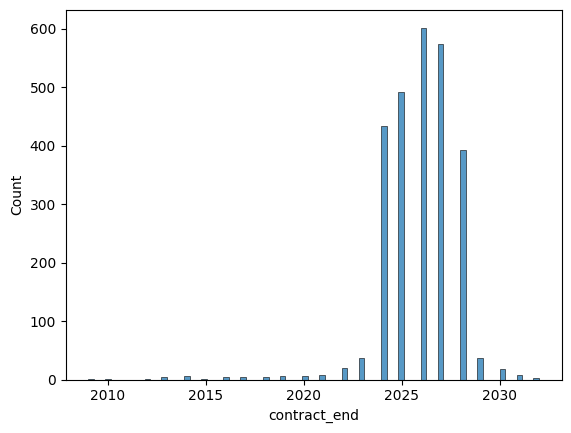

In [43]:
sns.histplot(df[df['contract_end']>0]['contract_end'])

In [44]:
print(df.columns.tolist())


['age', 'overall_rating', 'potential', 'id', 'height', 'weight', 'foot', 'best_overall', 'best_position', 'growth', 'value', 'wage', 'release_clause', 'total_attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'total_skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'total_movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'total_power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'total_mentality', 'aggression', 'interceptions', 'att._position', 'vision', 'penalties', 'composure', 'total_defending', 'defensive_awareness', 'standing_tackle', 'sliding_tackle', 'total_goalkeeping', 'total_stats', 'base_stats', 'international_reputation', 'pace_diving', 'shooting_handling', 'passing_kicking', 'dribbling_reflexes', 'defending_pace', 'player_name', 'position', 'no_of_playable_positions', 'team', 'contract_start', 'contract_end']


In [46]:
df.head()

,age,overall_rating,potential,id,height,weight,foot,best_overall,best_position,growth,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,att._position,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,sliding_tackle,total_goalkeeping,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,player_name,position,no_of_playable_positions,team,contract_start,contract_end,league_name,league_level
0,34,78,78,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,€4.1M,€45K,€0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,1875,377,3,49,72,83,84,28,Ronaldinho,"CAM, ST",2,Querétaro,2014,2016,NaN,0.5
1,19,65,81,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,€1.8M,€3K,€4.5M,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,1651,351,1,72,54,61,70,44,O. Hutchinson,"RM, CAM",2,Ipswich Town,2022,2025,NaN,0.5
2,23,82,86,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,€43.5M,€145K,€92.4M,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,1897,409,1,85,74,78,85,31,Brahim,CAM,1,Real Madrid,2019,2027,La Liga,1.0
3,17,62,80,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,€1M,€900,€2.3M,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,1644,353,1,72,50,59,66,52,K. Wätjen,CM,1,Borussia Dortmund,2024,2028,NaN,0.5
4,18,77,88,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,€22M,€41K,€49.5M,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,1960,405,1,72,70,80,81,52,A. Güler,"CAM, RM",2,Real Madrid,2023,2029,La Liga,1.0


In [47]:
# remove € from value, wage, release_clause columns

# check units
print(df.value.str[-1].unique())
print(df.wage.str[-1].unique())
print(df.release_clause.str[-1].unique())

def convert_value(value):
    if 'K' in value:
        return float(value.replace('€', '').replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('€', '').replace('M', '')) * 1000000
    else:
        return float(value.replace('€', ''))

# remove '€' and convert K and M in 'value', 'wage', and 'release_clause' columns
df['value'] = df['value'].apply(convert_value)
df['wage'] = df['wage'].apply(convert_value)
df['release_clause'] = df['release_clause'].apply(convert_value)

df.head()

['M' '0' 'K']
['K' '0']
['0' 'M' 'K']


,age,overall_rating,potential,id,height,weight,foot,best_overall,best_position,growth,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,att._position,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,sliding_tackle,total_goalkeeping,total_stats,base_stats,international_reputation,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,player_name,position,no_of_playable_positions,team,contract_start,contract_end,league_name,league_level
0,34,78,78,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,CAM,0,4100000.0,45000.0,0.0,367,84,69,50,82,82,430,86,86,87,81,90,313,50,48,73,70,72,314,74,55,41,72,72,319,60,25,66,82,86,0,78,25,28,25,54,1875,377,3,49,72,83,84,28,Ronaldinho,"CAM, ST",2,Querétaro,2014,2016,NaN,0.5
1,19,65,81,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,CAM,16,1800000.0,3000.0,4500000.0,266,48,53,49,66,50,304,69,52,50,65,68,366,76,69,81,61,79,272,62,56,63,47,44,264,41,37,60,65,61,63,140,40,49,51,39,1651,351,1,72,54,61,70,44,O. Hutchinson,"RM, CAM",2,Ipswich Town,2022,2025,NaN,0.5
2,23,82,86,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,CAM,4,43500000.0,145000.0,92400000.0,328,75,76,30,83,64,379,84,74,61,75,85,429,85,85,89,79,91,332,73,60,68,55,76,294,44,33,78,81,58,79,84,40,23,21,51,1897,409,1,85,74,78,85,31,Brahim,CAM,1,Real Madrid,2019,2027,La Liga,1.0
3,17,62,80,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,CAM,18,1000000.0,900.0,2300000.0,257,48,53,45,67,44,292,66,52,43,65,66,356,77,68,78,59,74,267,48,58,63,51,47,263,47,54,54,59,49,49,161,50,55,56,48,1644,353,1,72,50,59,66,52,K. Wätjen,CM,1,Borussia Dortmund,2024,2028,NaN,0.5
4,18,77,88,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,CAM,11,22000000.0,41000.0,49500000.0,340,80,68,41,81,70,403,83,84,76,79,81,380,75,69,82,69,85,308,72,50,70,43,73,316,42,55,68,80,71,77,155,52,57,46,58,1960,405,1,72,70,80,81,52,A. Güler,"CAM, RM",2,Real Madrid,2023,2029,La Liga,1.0


Text(0.5, 0, 'Player value')

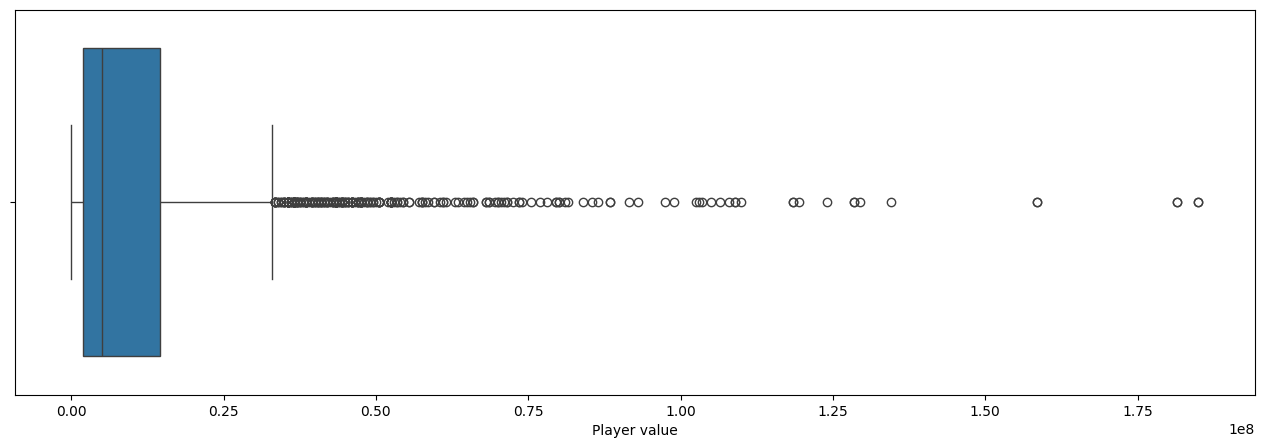

In [48]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df.value)
plt.xlabel('Player value')

In [49]:
# clean height and weight columns
df['height'] = df['height'].str.extract(r'(\d+)')
df['weight'] = df['weight'].str.extract(r'(\d+)')

df[['height', 'weight']].head()

,height,weight
0,182,76
1,174,65
2,170,68
3,178,72
4,175,70


Exploration et analyse des donnees

<Axes: >

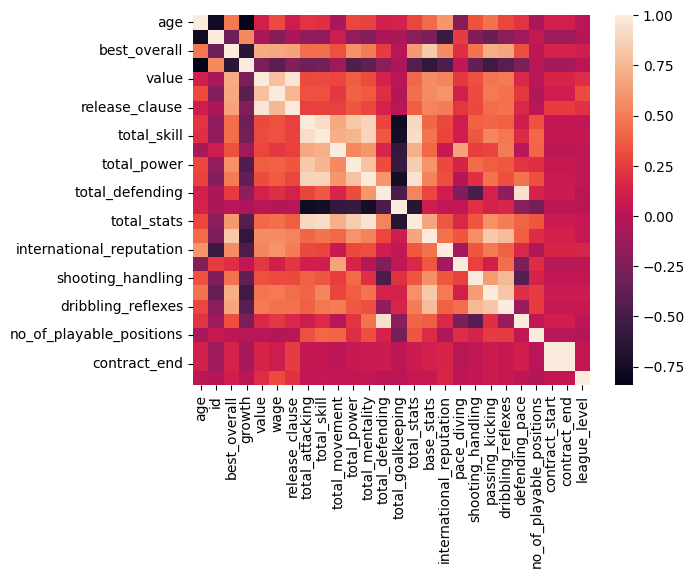

In [50]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=False)

<Axes: >

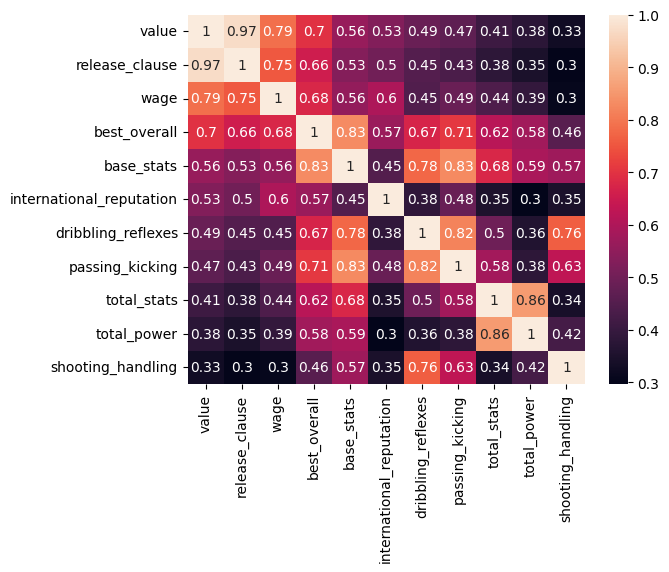

In [51]:
# get top 10 correlated variables with respect to 'value' column
top_correlations = df.select_dtypes(include='number').corr().abs().sort_values(by='value', ascending=False)[1:11]
top_correlated_variables = ['value']
top_correlated_variables.extend(list(top_correlations.index))

sns.heatmap(df[top_correlated_variables].corr(), annot=True)

In [52]:
# group each player's (best) position as goalkeeper, defender, midfielder, and forward
print(df.best_position.unique(), '\n')

position_mapping = {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'RWB': 'Defender',
    'LWB': 'Defender',
    'CDM': 'Midfielder',
    'CM': 'Midfielder',
    'CAM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'RW': 'Forward',
    'LW': 'Forward',
    'CF': 'Forward',
    'ST': 'Forward'
}

df['core_position'] = df['best_position'].map(position_mapping)
df.core_position.value_counts()

['CAM' 'ST' 'LWB' 'CB' 'CM' 'RM' 'CDM' 'LM' 'RB' 'RWB' 'LB' 'LW' 'GK' 'CF'
 'RW'] 



,count
core_position,
Midfielder,1411
Defender,889
Forward,604
Goalkeeper,216


<Axes: xlabel='height', ylabel='value'>

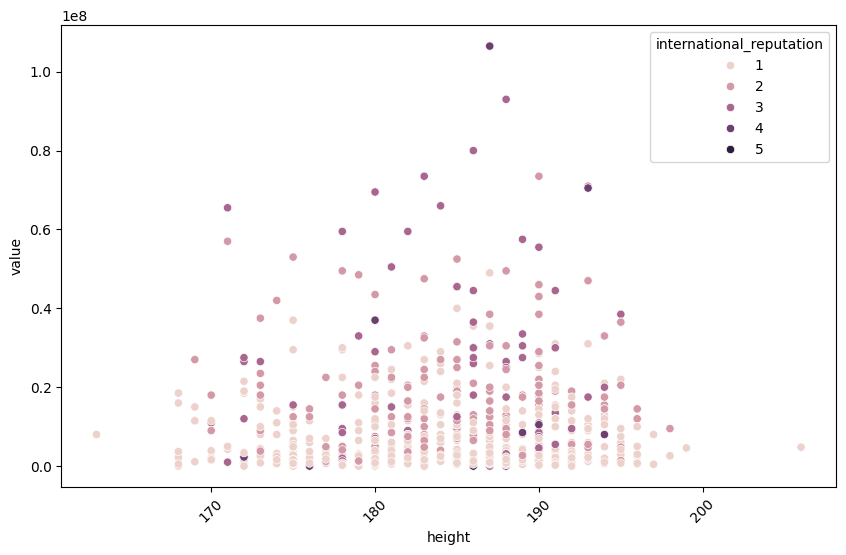

In [53]:
df.height = df.height.astype(int)
df_defenders = df.loc[df['core_position'] == 'Defender']

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

sns.scatterplot(data=df_defenders, x='height', y='value', hue='international_reputation')

<Axes: xlabel='best_overall', ylabel='value'>

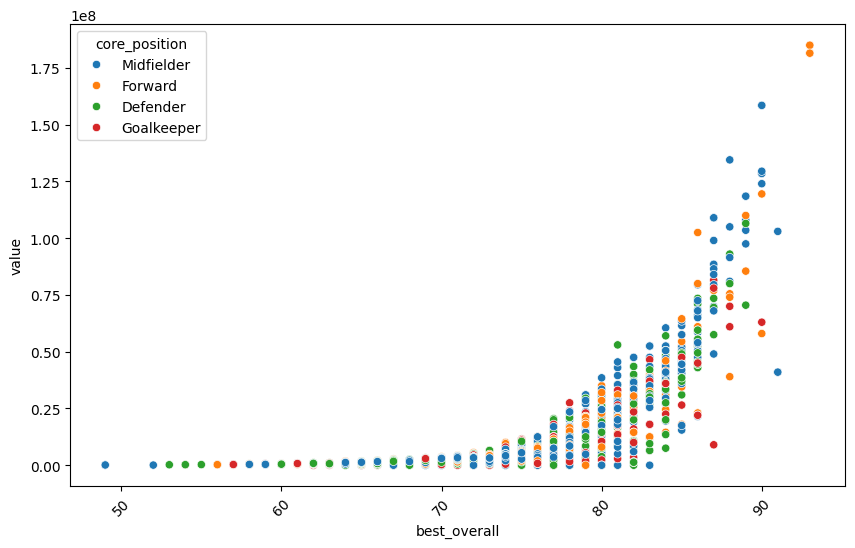

In [54]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

sns.scatterplot(data=df, x='best_overall', y='value', hue='core_position')

<Axes: xlabel='value', ylabel='core_position'>

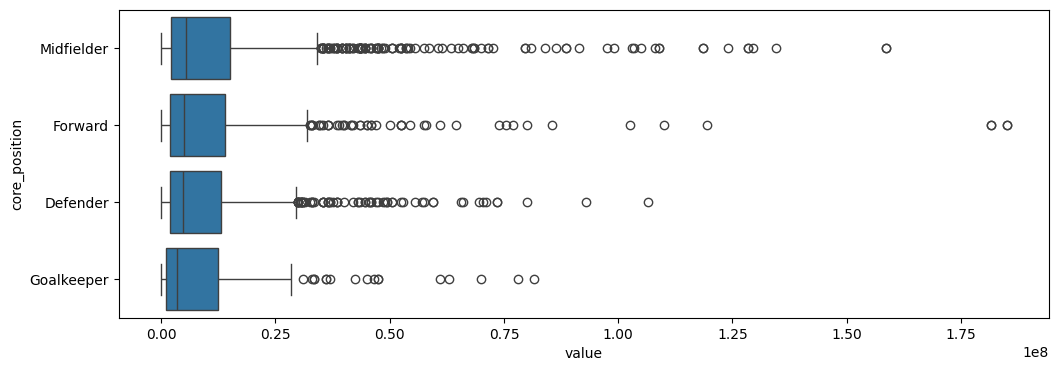

In [55]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, y='core_position', x='value')

In [56]:
# create age range brackets
age_bins = [10, 20, 30, 40]
age_labels = ['10-19', '20-29', '30-39']

df['age_brackets'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df[['age', 'age_brackets']].head()

,age,age_brackets
0,34,30-39
1,19,10-19
2,23,20-29
3,17,10-19
4,18,10-19


In [57]:
df.potential = df.potential.str[:2].astype(int)
df.potential.unique()

array([78, 81, 86, 80, 88, 75, 87, 92, 82, 90, 89, 94, 85, 84, 77, 83, 91,
       93, 73, 74, 76, 72, 79, 69, 71, 70, 64, 68, 65, 67, 66, 61, 62, 63,
       57, 54])

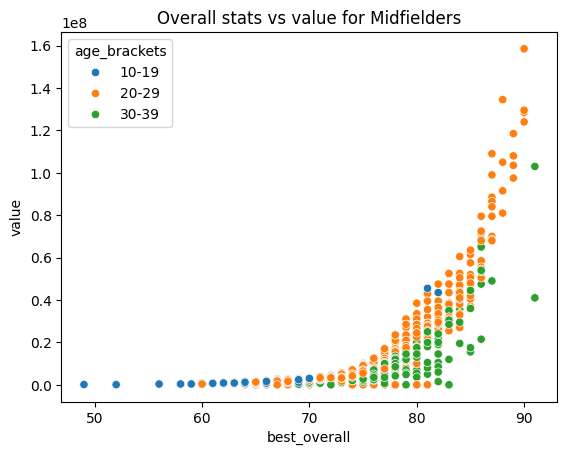

In [58]:
df_midfielders = df.loc[df['core_position'] == 'Midfielder']

sns.scatterplot(data=df_midfielders, x='best_overall', y='value', hue='age_brackets')
plt.title('Overall stats vs value for Midfielders')
plt.show()

<Axes: xlabel='potential', ylabel='value'>

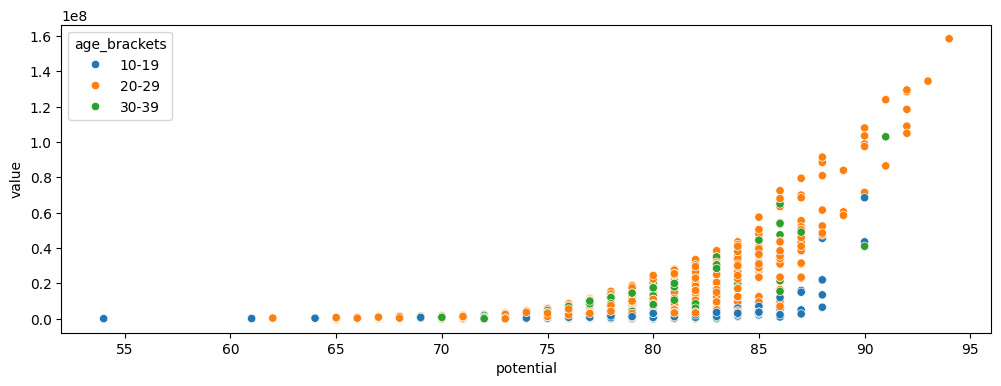

In [59]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df_midfielders, x='potential', y='value', hue='age_brackets')

Entrainement de modele : Prédire la valeur des joueurs et identifier les superstars sous-évaluées afin d’orienter les décisions de transfert.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler

In [61]:
# Introduction des parametres qu'on va utiliser et la cible
features = ['best_overall', 'age', 'growth', 'total_attacking', 'total_skill', 'international_reputation', 'dribbling_reflexes', 'passing_kicking']
label = 'value'

In [62]:
# Ajouter league_level aux features
features.append('league_level')

In [63]:
# scale features
scaler = StandardScaler()

X = df_midfielders[features]
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features)

y = df_midfielders[label]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [65]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE lr : {rmse_lr}")

RMSE lr : 9661965.522650613


In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"RMSE rfr: {rmse_rf}")

RMSE rfr: 4229683.519525371


In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'max_depth': 20, 'n_estimators': 300}
Best Estimator: RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)


In [68]:
feature_importances = best_estimator.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

feature_importance_dict

{'best_overall': 0.8982937437889696,
 'age': 0.0404672521350002,
 'growth': 0.02226696463674748,
 'total_attacking': 0.006111843227000112,
 'total_skill': 0.010989778465626106,
 'international_reputation': 0.0032945015962056795,
 'dribbling_reflexes': 0.01027647439785272,
 'passing_kicking': 0.007305799966885009,
 'league_level': 0.000993641785713134}

In [69]:
y_pred_best = best_estimator.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f'RMSE of best model: {rmse_best}')

RMSE of best model: 4317129.935269402


In [70]:
y_pred_best[:10]

array([16813333.33333333,  7397333.33333333, 16920000.        ,
        3000666.66666667,  5191333.33333333,   800916.66666667,
        2507666.66666667,  1608333.33333333, 11381666.66666667,
        1160000.        ])

In [71]:
data_for_prediction = df.loc[X_test.index]
data_for_prediction.head()
data_for_prediction.columns

Index(['age', 'overall_rating', 'potential', 'id', 'height', 'weight', 'foot',
       'best_overall', 'best_position', 'growth', 'value', 'wage',
       'release_clause', 'total_attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'total_skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'total_movement', 'acceleration', 'sprint_speed', 'agility',
       'reactions', 'balance', 'total_power', 'shot_power', 'jumping',
       'stamina', 'strength', 'long_shots', 'total_mentality', 'aggression',
       'interceptions', 'att._position', 'vision', 'penalties', 'composure',
       'total_defending', 'defensive_awareness', 'standing_tackle',
       'sliding_tackle', 'total_goalkeeping', 'total_stats', 'base_stats',
       'international_reputation', 'pace_diving', 'shooting_handling',
       'passing_kicking', 'dribbling_reflexes', 'defending_pace',
       'player_name', 'position', 'no_of_playable_positions', 'tea

In [72]:
data_for_prediction['predicted_value'] = y_pred_best.astype(int)
data_for_prediction['gap'] = data_for_prediction['predicted_value'] - data_for_prediction['value']
data_for_prediction[['player_name', 'best_overall', 'potential', 'value', 'predicted_value', 'gap']]

,player_name,best_overall,potential,value,predicted_value,gap
292,W. Fofana,80,84,20500000.0,16813333,-3686667.0
568,B. Sosa,78,80,13000000.0,7397333,-5602667.0
428,O. Zinchenko,83,82,27500000.0,16920000,-10580000.0
1174,M. Cash,79,80,19000000.0,3000666,-15999334.0
1123,N. Patterson,72,82,5000000.0,5191333,191333.0
...,...,...,...,...,...,...
168,G. Restes,75,87,11500000.0,95868333,84368333.0
800,Pablo Maffeo,79,82,21500000.0,11871666,-9628334.0
1134,Lee Han Beom,72,81,3300000.0,2846666,-453334.0
966,L. Kelly,76,77,5000000.0,1496083,-3503917.0


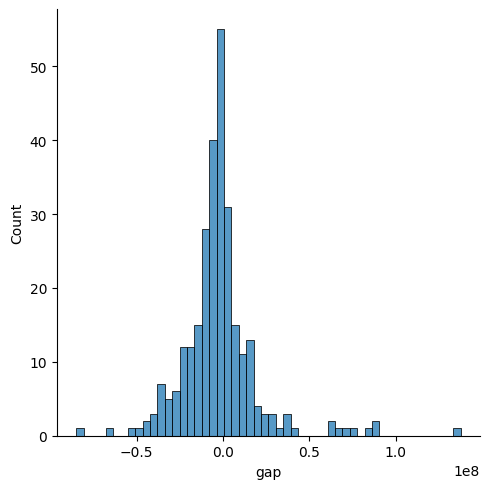

In [73]:
sns.displot(data_for_prediction.gap)

In [74]:
# top undervalued players to buy
under_valued_midfielders = data_for_prediction.loc[data_for_prediction['gap'] >= 1e7]
under_valued_midfielders[['player_name', 'best_overall', 'potential', 'age', 'gap']].sort_values(by='gap', ascending=False).head(30)

,player_name,best_overall,potential,age,gap
51,R. Bardghji,71,85,17,137805000.0
148,S. Szmodics,75,75,27,90551666.0
358,M. Soulé,76,86,20,87256666.0
168,G. Restes,75,87,18,84368333.0
75,W. Zaïre-Emery,82,90,17,74041666.0
100,Palhinha,86,85,27,71313333.0
201,A. Vermeeren,78,87,18,68060000.0
112,R. Bardghji,71,85,17,62745000.0
57,Pau Cubarsí,66,83,16,62283333.0
214,L. Miley,72,85,17,40440000.0
